# Time Series Analysis
* Pelatihan Jarak Jauh Data Analytics
* oleh : Aris Budi Santoso

#Install Library

In [1]:
!pip install --upgrade Cython
!pip install --upgrade statsmodels
!pip install --upgrade scikit-learn

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\cython.cpython-39.pyc'
Consider using the `--user` option or check the permissions.



ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 462, in read
    n = self.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

# ARIMA
* Autoregressive Integrated Moving Average

## Membuka file csv timeseries dataset

In [2]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [3]:
# Membuka data

import pandas as pd
link_file = 'https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/05.%20Basic%20Machine%20Learning/use%20case%20ML/Electric_Production.csv'
df = pd.read_csv(link_file,skiprows=[1])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        396 non-null    object 
 1   IPG2211A2N  396 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df = df.set_index('DATE')
df.index

DatetimeIndex(['1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
               '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01',
               '1985-10-01', '1985-11-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=396, freq=None)

In [7]:
df.head()

,IPG2211A2N
DATE,
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904


## Pengecekan Prasyarat Awal

### Rolling statistics

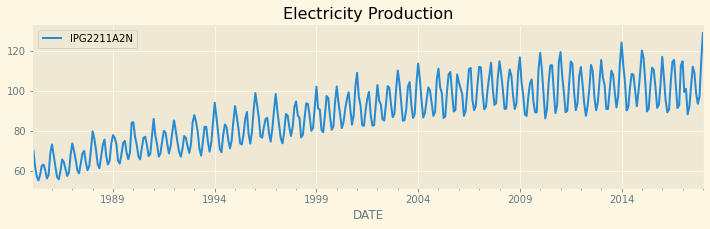

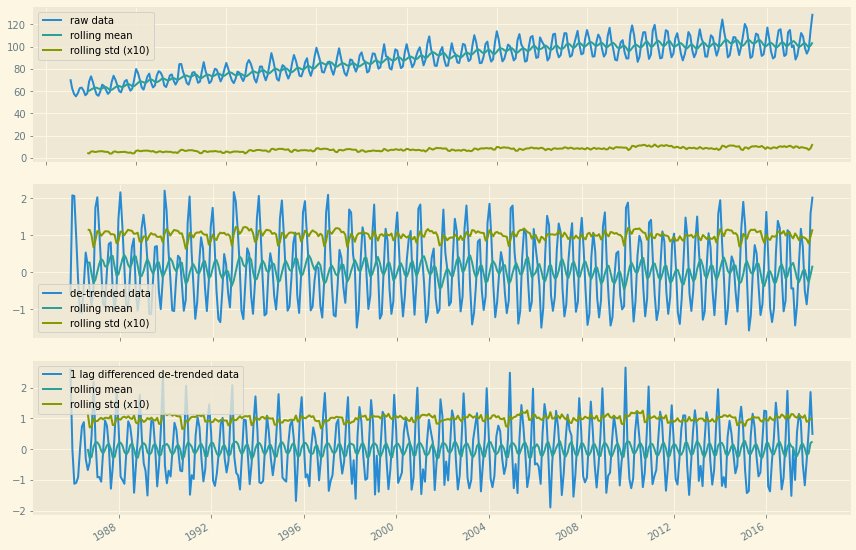

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('Solarize_Light2')

df.plot(figsize=(12,3));
plt.title('Electricity Production');

df['prod_z'] = (df - df.rolling(window=10).mean()) / df.rolling(window=10).std()
df['prod_zp'] = df['prod_z'] - df['prod_z'].shift(1)

fig, ax = plt.subplots(3,figsize=(12, 9))
ax[0].plot(df.index, df['IPG2211A2N'], label='raw data')
ax[0].plot(df['IPG2211A2N'].rolling(window=10).mean(), label="rolling mean");
ax[0].plot(df['IPG2211A2N'].rolling(window=10).std(), label="rolling std (x10)");
ax[0].legend()

ax[1].plot(df.index, df['prod_z'], label="de-trended data")
ax[1].plot(df['prod_z'].rolling(window=10).mean(), label="rolling mean");
ax[1].plot(df['prod_z'].rolling(window=10).std(), label="rolling std (x10)");
ax[1].legend()

ax[2].plot(df.index, df['prod_zp'], label="1 lag differenced de-trended data")
ax[2].plot(df['prod_zp'].rolling(window=10).mean(), label="rolling mean");
ax[2].plot(df['prod_zp'].rolling(window=10).std(), label="rolling std (x10)");
ax[2].legend()

plt.tight_layout()
fig.autofmt_xdate()

### Augmented Dickey-Fuller Test

Cara membuat data menjadi stationer:
1. De-trending: menghilangkan tren dalam data, misalnya dengan membagi dengan deflator dalam data yang berkaitan dengan nilai mata uang atau melakukan scalling menggunakan z-score

2. Differencing: mengurangkan nilai dengan nilai sebelumnya dalam periode tertentu, untuk data yang mengandung seasonality dapat dilakukan dengan mengurangkan dengan nilai-lag dalam periode seasonality tersebut

3. Logging: menghilangkan exponential trend

In [9]:
from statsmodels.tsa.stattools import adfuller

df.dropna()
print(" > Is the data stationary ?")
dftest = adfuller(df['IPG2211A2N'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the de-trended data stationary ?")
dftest = adfuller(df['prod_z'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the 12-lag differenced de-trended data stationary ?")
dftest = adfuller(df['prod_zp'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -2.273
P-value = 0.181
Critical values :
	1%: -3.4476763783532585 - The data is not stationary with 99% confidence
	5%: -2.869176103659426 - The data is not stationary with 95% confidence
	10%: -2.570837873961219 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -5.423
P-value = 0.000
Critical values :
	1%: -3.4480996560263386 - The data is  stationary with 99% confidence
	5%: -2.8693621113224137 - The data is  stationary with 95% confidence
	10%: -2.570937038891028 - The data is  stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -8.557
P-value = 0.000
Critical values :
	1%: -3.4482453822848496 - The data is  stationary with 99% confidence
	5%: -2.8694261442901396 - The data is  stationary with 95% confidence
	10%: -2.5709711770439507 - The data is  stationary with 90% confidence


## Differencing

In [10]:
diffseries = df.loc[:, ['IPG2211A2N']]


In [11]:
diffseries['diff'] = diffseries['IPG2211A2N'] - diffseries['IPG2211A2N'].shift(1)
diffseries.dropna(inplace=True)
diffseries

,IPG2211A2N,diff
DATE,,
1985-03-01,62.4502,-8.2218
1985-04-01,57.4714,-4.9788
1985-05-01,55.3151,-2.1563
1985-06-01,58.0904,2.7753
1985-07-01,62.6202,4.5298
...,...,...
2017-09-01,98.6154,-10.3158
2017-10-01,93.6137,-5.0017
2017-11-01,97.3359,3.7222


In [12]:
print(" > Is the data stationary ?")
dftest = adfuller(diffseries['diff'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the de-trended data stationary ?")
dftest = adfuller(df['prod_z'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the 12-lag differenced de-trended data stationary ?")
dftest = adfuller(df['prod_zp'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -7.093
P-value = 0.000
Critical values :
	1%: -3.4476763783532585 - The data is  stationary with 99% confidence
	5%: -2.869176103659426 - The data is  stationary with 95% confidence
	10%: -2.570837873961219 - The data is  stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -5.423
P-value = 0.000
Critical values :
	1%: -3.4480996560263386 - The data is  stationary with 99% confidence
	5%: -2.8693621113224137 - The data is  stationary with 95% confidence
	10%: -2.570937038891028 - The data is  stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -8.557
P-value = 0.000
Critical values :
	1%: -3.4482453822848496 - The data is  stationary with 99% confidence
	5%: -2.8694261442901396 - The data is  stationary with 95% confidence
	10%: -2.5709711770439507 - The data is  stationary with 90% confidence


### Decomposition

Memecah data time series menjadi 3 komponen:
1. trend
2. seasonal
3. residual

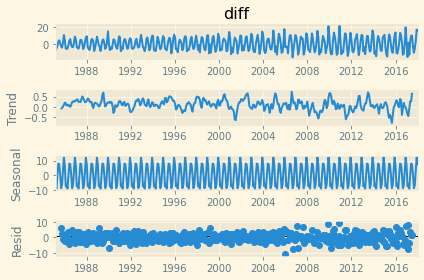

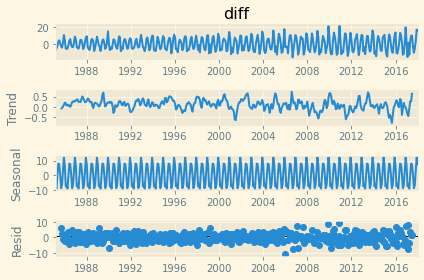

In [13]:
# Decomposition electricity production

from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(diffseries['diff'], period=12)
decomp.plot()

### Cek autocorrelation antara series dengan lag-nya

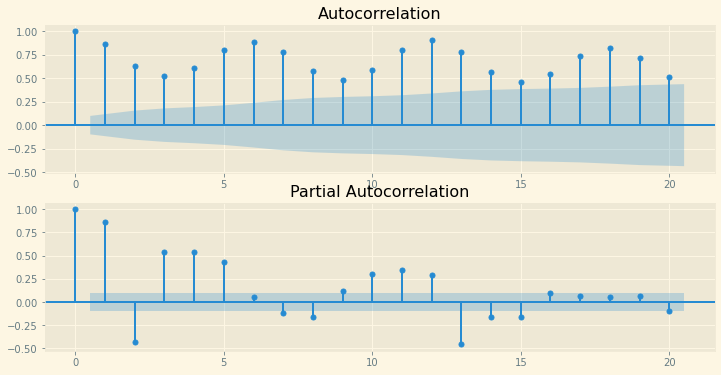

In [14]:
# cek produksi listrik

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df['IPG2211A2N'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(df['IPG2211A2N'].dropna(), ax=ax[1], lags=20)

Cara menentukan order dari ARIMA:
![image.png](attachment:image.png)

Sumber: https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8

## Forecasting dengan ARIMA

In [15]:
# Import numpy

import numpy as np

In [16]:
import statsmodels.api as sm
import itertools
import warnings

prod = df['IPG2211A2N'].dropna()

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(prod,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue

mod = sm.tsa.statespace.SARIMAX(prod,
                                order=best_result[0],
                                seasonal_order=best_result[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [17]:
best_result

[(1, 1, 1), (0, 1, 1, 12), 1720.8325456579319]

### Import ARIMA Model

                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  396
Model:                          ARIMA   Log Likelihood               -1643.830
Date:                Mon, 20 Jun 2022   AIC                           3291.660
Time:                        20:38:34   BIC                           3299.623
Sample:                    02-01-1985   HQIC                          3294.815
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.8885      0.774    114.836      0.000      87.371      90.406
sigma2       236.1318     20.830     11.336      0.000     195.305     276.958
Ljung-Box (L1) (Q):                 296.53   Jarque-

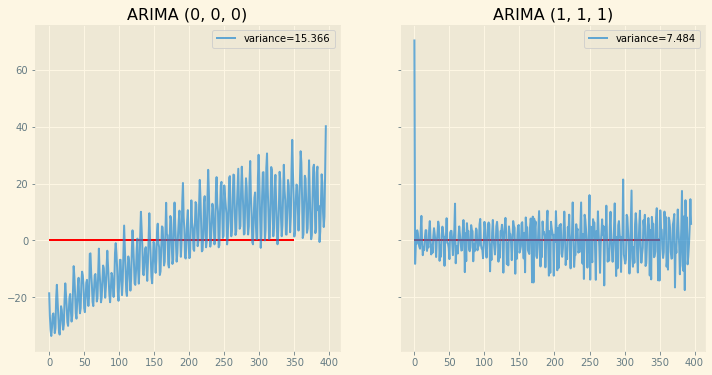

In [18]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['IPG2211A2N'].dropna(), order=(0, 0, 0))
mod_000 = model.fit()
print(mod_000.summary())

model = ARIMA(df['IPG2211A2N'].dropna(), order=(1, 1, 1))
mod_fn = model.fit()
print(mod_fn.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(mod_000.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(mod_000.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("ARIMA (0, 0, 0)");
ax[0].legend();

ax[1].plot(mod_fn.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(mod_fn.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("ARIMA (1, 1, 1)");
ax[1].legend();

### Ploting Prediction

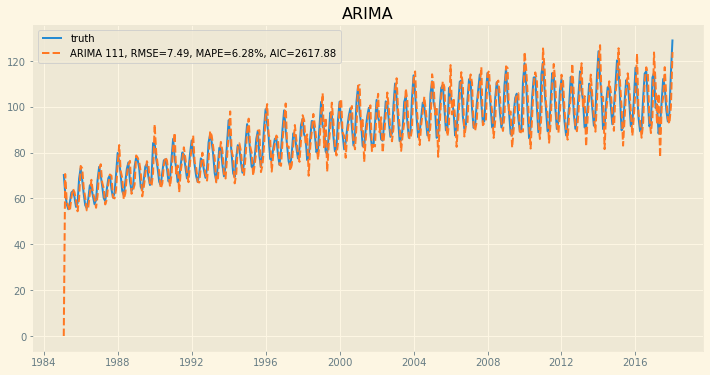

In [19]:
pred = mod_fn.get_prediction(dynamic=False)
y_pred = pred.predicted_mean
sse = np.sqrt(np.mean(np.square(y_pred - df['IPG2211A2N'])))
mape = np.mean(np.abs((y_pred - df['IPG2211A2N'])/df['IPG2211A2N']))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['IPG2211A2N'], label='truth');
ax.plot(y_pred, linestyle='--', color='#ff7823', label="ARIMA 111, RMSE={:0.2f}, MAPE={:0.2f}%, AIC={:0.2f}".format(sse, mape*100, mod_fn.aic));
ax.legend();
ax.set_title("ARIMA");

### Quality Metrics

Statistical information yang digunakan untuk melihat kualitas model forecasting di antaranya adalah:
1. RMSE: Root Mean Square Error
2. MAPE: Mean absolute percentage error
3. AIC: Akaike information criterion --> AIC dikembangkan oleh Hirotugu Akaike yang bertujuan untuk mencegah overfitting dengan lebih mengutamakan model yang simpel dibandingkan yang kompleks. 

Nilai yang lebih rendah mengindikasikan kualitas model yang lebih baik

MAPE:
![image.png](attachment:image.png)

Sumber: Lewis (1982) dalam Kasemset, sae-haew, & Sopadang (2014)

#### Train-Test Split 

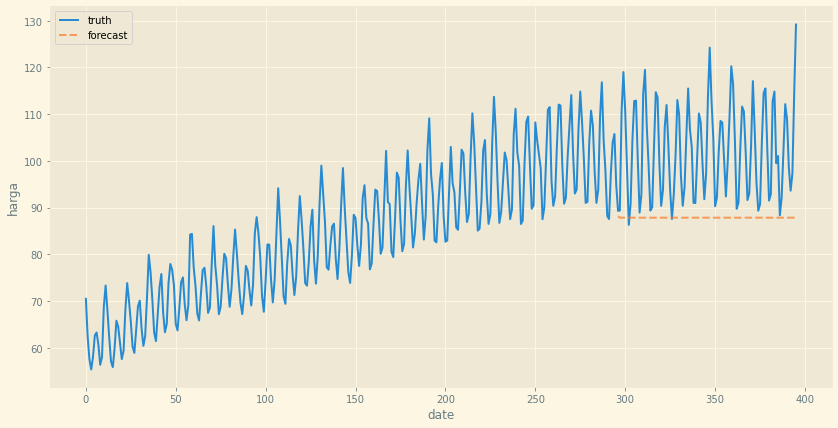

In [20]:
df2 = df['IPG2211A2N'].reset_index()

train_data, test_data = df2['IPG2211A2N'][0:-100], df2['IPG2211A2N'][-100:]

model_ev = ARIMA(train_data.dropna(), order=(1, 1, 1))
mod_fn_ev = model_ev.fit()
pred_ev = mod_fn_ev.forecast(100)
ax = df2['IPG2211A2N'].plot(label='truth')
pred_ev.plot(linestyle='--', color='#ff7823', ax=ax, label='forecast', alpha=.7, figsize=(14, 7))

ax.set_xlabel('date')
ax.set_ylabel('harga')
plt.legend()
plt.show()

In [21]:
# Quality Metrics

from sklearn.metrics import mean_squared_error , mean_absolute_percentage_error, r2_score

rmse = lambda act, pred: np.sqrt(mean_squared_error(act, pred))

print('RMSE: {:0.2f}'.format(rmse(test_data, pred_ev)))
print('MAPE: {:0.2f}%'.format(mean_absolute_percentage_error(test_data, pred_ev)*100))
print('R-Square: {:0.2f}'.format(r2_score(test_data, pred_ev)))

RMSE: 17.64
MAPE: 13.50%
R-Square: -2.18


#### Multiple Train-Test Splits

Metode multiple train-test splits:
1. Sliding-windows

![0_Xsn88jB5XTMDMN-Z.png](attachment:0_Xsn88jB5XTMDMN-Z.png)

2. Expanding-windows
![backtest_orbit-1.gif](attachment:backtest_orbit-1.gif)

Sumber: https://eng.uber.com/orbit/ ; https://towardsdatascience.com/predicting-future-stock-market-trends-with-python-machine-learning-2bf3f1633b3c

Observations: 198
Training Observations: 99
Testing Observations: 99
Observations: 297
Training Observations: 198
Testing Observations: 99
Observations: 396
Training Observations: 297
Testing Observations: 99


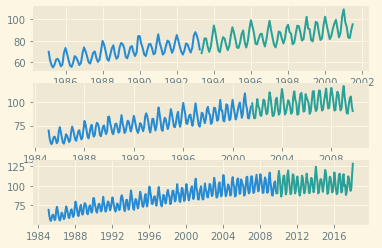

In [22]:
# Expanding Windows

from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot

X = df['IPG2211A2N']
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train_tlkm_mul = X[train_index]
    test_tlkm_mul = X[test_index]
    print('Observations: %d' % (len(train_tlkm_mul) + len(test_tlkm_mul)))
    print('Training Observations: %d' % (len(train_tlkm_mul)))
    print('Testing Observations: %d' % (len(test_tlkm_mul)))
    pyplot.subplot(310 + index)
    pyplot.plot(train_tlkm_mul)
    pyplot.plot(test_tlkm_mul)
    index += 1
pyplot.show()

RMSE: 21.14
MAPE: 22.00%
RMSE: 8.59
MAPE: 7.63%
RMSE: 16.21
MAPE: 11.94%
RMSE_mean: 15.31
MAPE_mean: 13.86%


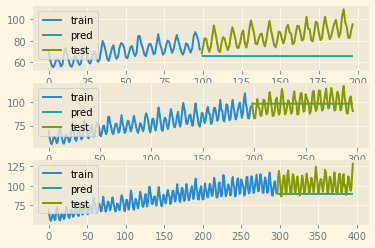

In [23]:
# Quality Metrics

df2 = df.reset_index()
X2 = df2['IPG2211A2N']
RMSE = []
MAPE = []

pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X2):
    train_mul = X2[train_index]
    test_mul = X2[test_index]
    model_mul = ARIMA(train_mul.dropna(), order=(1, 1, 1))
    mod_fn_mul = model_mul.fit()
    pred_mul = mod_fn_mul.forecast(len(test_mul))
    
    RMSE.append(rmse(test_mul, pred_mul))
    MAPE.append(mean_absolute_percentage_error(test_mul, pred_mul))
    
    print('RMSE: {:0.2f}'.format(RMSE[index-1]))
    print('MAPE: {:0.2f}%'.format(MAPE[index-1]*100))
    pyplot.subplot(310 + index)
    pyplot.plot(train_mul, label='train')
    pyplot.plot(pred_mul, label='pred')
    pyplot.plot(test_mul, label='test')
    pyplot.legend()
    index += 1
    
RMSE = np.mean(RMSE)
MAPE = np.mean(MAPE)
print('RMSE_mean: {:0.2f}'.format(RMSE))
print('MAPE_mean: {:0.2f}%'.format(MAPE*100))

### Forecasting

Proyeksi hari ke-1: 133
Proyeksi hari ke-2: 134
Proyeksi hari ke-3: 134
Proyeksi hari ke-4: 134
Proyeksi hari ke-5: 134
Proyeksi hari ke-6: 134
Proyeksi hari ke-7: 134
Proyeksi hari ke-8: 134
Proyeksi hari ke-9: 134
Proyeksi hari ke-10: 134
Proyeksi hari ke-11: 134
Proyeksi hari ke-12: 134
Proyeksi hari ke-13: 134
Proyeksi hari ke-14: 134
Proyeksi hari ke-15: 134
Proyeksi hari ke-16: 134
Proyeksi hari ke-17: 134
Proyeksi hari ke-18: 134
Proyeksi hari ke-19: 134
Proyeksi hari ke-20: 134
Proyeksi hari ke-21: 134
Proyeksi hari ke-22: 134
Proyeksi hari ke-23: 134
Proyeksi hari ke-24: 134
Proyeksi hari ke-25: 134
Proyeksi hari ke-26: 134
Proyeksi hari ke-27: 134
Proyeksi hari ke-28: 134
Proyeksi hari ke-29: 134
Proyeksi hari ke-30: 134


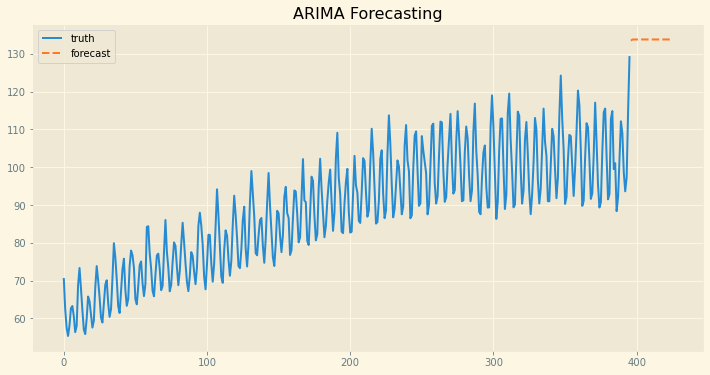

In [24]:
model_fc = ARIMA(df2['IPG2211A2N'].dropna(), order=(1, 1, 1))
result = model_fc.fit()

fc = result.forecast(30)
for i in range(30):
    print("Proyeksi hari ke-"+str(i+1)+": %.0f" % (fc[i:i+1]))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df2['IPG2211A2N'], label='truth');
ax.plot(fc, linestyle='--', color='#ff7823', label="forecast");
ax.legend();
ax.set_title("ARIMA Forecasting");

# SARIMA dan Exponential Smoothing

## Membuka file csv dataset

In [26]:
# Membuka data

import pandas as pd
ecprod = pd.read_csv(link_file,skiprows=[1])

In [27]:
ecprod['DATE'] = pd.to_datetime(ecprod['DATE'])

In [28]:
# Preview data

ecprod = ecprod.set_index('DATE')

ecprod.tail()

,IPG2211A2N
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


## Pengecekan Prasyarat Awal

### Rolling statistics 

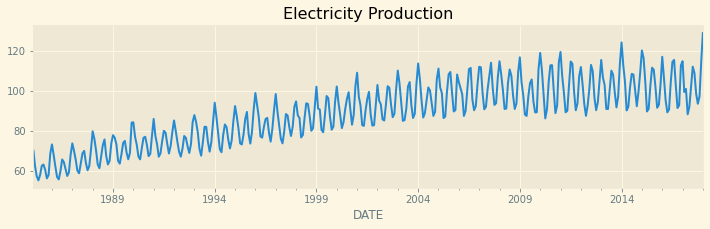

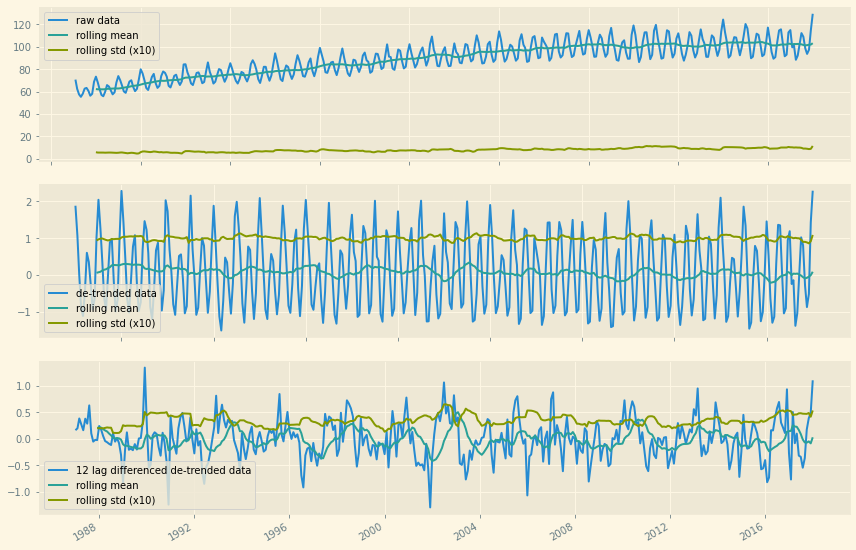

In [29]:
plt.style.use('Solarize_Light2')

ecprod['IPG2211A2N'].plot(figsize=(12,3));
plt.title('Electricity Production');

ecprod['z_prod'] = (ecprod['IPG2211A2N'] - ecprod['IPG2211A2N'].rolling(window=12).mean()) / ecprod['IPG2211A2N'].rolling(window=12).std()
ecprod['zp_prod'] = ecprod['z_prod'] - ecprod['z_prod'].shift(12)

def plot_rolling(df):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(df.index, df['IPG2211A2N'], label='raw data')
    ax[0].plot(df['IPG2211A2N'].rolling(window=12).mean(), label="rolling mean");
    ax[0].plot(df['IPG2211A2N'].rolling(window=12).std(), label="rolling std (x10)");
    ax[0].legend()

    ax[1].plot(df.index, df['z_prod'], label="de-trended data")
    ax[1].plot(df['z_prod'].rolling(window=12).mean(), label="rolling mean");
    ax[1].plot(df['z_prod'].rolling(window=12).std(), label="rolling std (x10)");
    ax[1].legend()

    ax[2].plot(df.index, df['zp_prod'], label="12 lag differenced de-trended data")
    ax[2].plot(df['zp_prod'].rolling(window=12).mean(), label="rolling mean");
    ax[2].plot(df['zp_prod'].rolling(window=12).std(), label="rolling std (x10)");
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()
    
plot_rolling(ecprod)

### Augmented Dickey-Fuller Test

In [30]:
from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary ?")
dftest = adfuller(ecprod['IPG2211A2N'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the de-trended data stationary ?")
dftest = adfuller(ecprod.z_prod.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the 12-lag differenced de-trended data stationary ?")
dftest = adfuller(ecprod.zp_prod.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -2.273
P-value = 0.181
Critical values :
	1%: -3.4476763783532585 - The data is not stationary with 99% confidence
	5%: -2.869176103659426 - The data is not stationary with 95% confidence
	10%: -2.570837873961219 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -6.006
P-value = 0.000
Critical values :
	1%: -3.448147967010838 - The data is  stationary with 99% confidence
	5%: -2.8693833397824413 - The data is  stationary with 95% confidence
	10%: -2.5709483564645725 - The data is  stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -7.331
P-value = 0.000
Critical values :
	1%: -3.448645946352023 - The data is  stationary with 99% confidence
	5%: -2.869602139060357 - The data is  stationary with 95% confidence
	10%: -2.5710650077160495 - The data is  stationary with 90% confidence


### Decomposition 

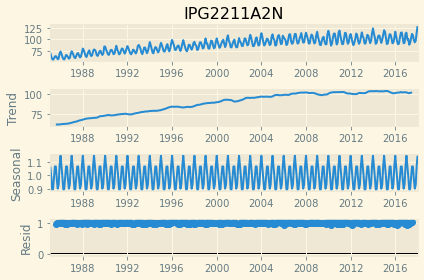

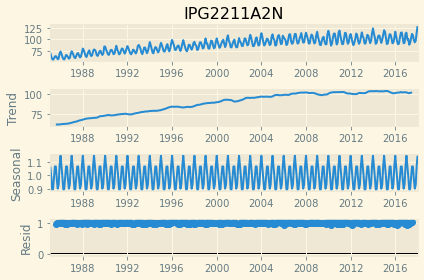

In [31]:
# Decomposition

decomp = seasonal_decompose(ecprod['IPG2211A2N'], model='multiplicable', period=12)
decomp.plot()

## Forecasting dengan SARIMA

### Import SARIMA Model

In [32]:
import statsmodels.api as sm
import itertools
import warnings
import numpy as np

prod = ecprod['IPG2211A2N']

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(prod,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue

mod = sm.tsa.statespace.SARIMAX(prod,
                                order=best_result[0],
                                seasonal_order=best_result[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [33]:
# Model dengan AIC terendah

best_result

[(1, 1, 1), (0, 1, 1, 12), 1720.8325456579319]

### Ploting Prediction

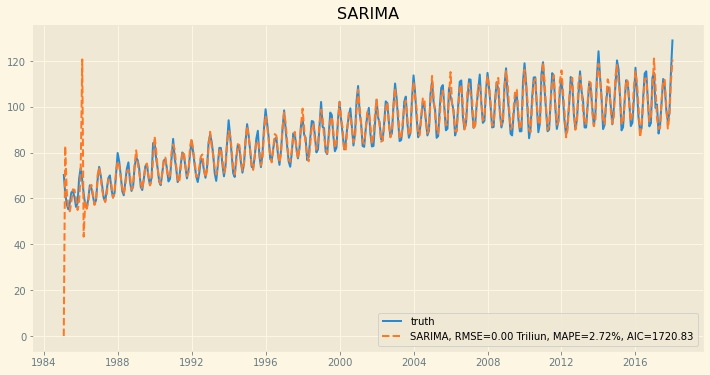

In [34]:
pred_sar = results.get_prediction(dynamic=False)
y_pred_sar = pred_sar.predicted_mean
sse = np.sqrt(np.mean(np.square(y_pred_sar - ecprod['IPG2211A2N'])))
mape = np.mean(np.abs((y_pred_sar - ecprod['IPG2211A2N'])/ecprod['IPG2211A2N']))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ecprod['IPG2211A2N'], label='truth');
ax.plot(y_pred_sar, linestyle='--', color='#ff7823', label="SARIMA, RMSE={:0.2f} Triliun, MAPE={:0.2f}%, AIC={:0.2f}".format(sse/1000000000000, mape*100, results.aic));
ax.legend();
ax.set_title("SARIMA");

### Quality Metrics

#### Train-Test Split 

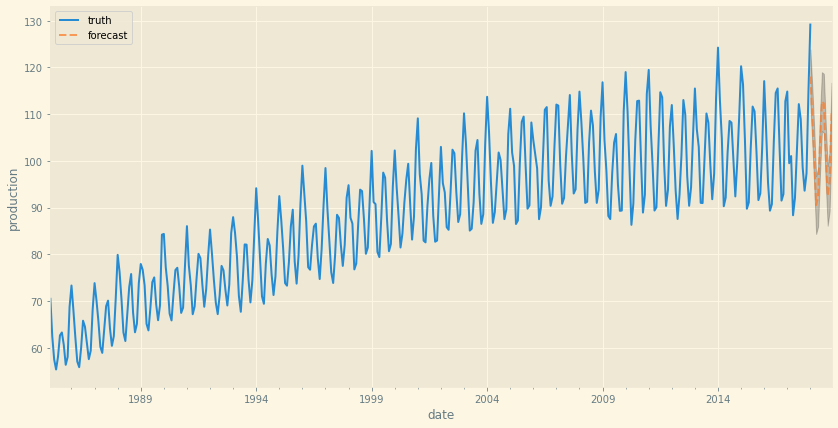

Proyeksi 2018-01-01 00:00:00: 118.05
Proyeksi 2018-02-01 00:00:00: 109.92
Proyeksi 2018-03-01 00:00:00: 100.84
Proyeksi 2018-04-01 00:00:00: 90.53
Proyeksi 2018-05-01 00:00:00: 92.18
Proyeksi 2018-06-01 00:00:00: 103.41
Proyeksi 2018-07-01 00:00:00: 112.69
Proyeksi 2018-08-01 00:00:00: 112.32
Proyeksi 2018-09-01 00:00:00: 101.59
Proyeksi 2018-10-01 00:00:00: 92.50
Proyeksi 2018-11-01 00:00:00: 95.62
Proyeksi 2018-12-01 00:00:00: 110.29


In [35]:
train_prod, test_prod = ecprod['IPG2211A2N'][0:-12], ecprod['IPG2211A2N'][-12:]

mod_ev = sm.tsa.statespace.SARIMAX(train_prod,
                                order=best_result[0],
                                seasonal_order=best_result[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_ev = mod_ev.fit()

pred_sar_ev = results_ev.get_prediction(start=pd.to_datetime('2018-01-01'), end=pd.to_datetime('2018-12-01'), dynamic=False)
pred_sar_ci = pred_sar_ev.conf_int()
ax = ecprod['IPG2211A2N'].plot(label='truth')
pred_sar_ev.predicted_mean.plot(linestyle='--', color='#ff7823', ax=ax, label='forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_sar_ci.index,
                pred_sar_ci.iloc[:, 0],
                pred_sar_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('production')
plt.legend()
plt.show()

forecast_ev = pred_sar_ev.predicted_mean
for i in range(12):
     print("Proyeksi "+str(pd.to_datetime('2018-01-01') + pd.DateOffset(months=i))+": %.2f" % (forecast_ev[i:i+1]))

In [36]:
# Quality Metrics

print('RMSE: {:0.2f}'.format(rmse(test_prod, forecast_ev)))
print('MAPE: {:0.2f}%'.format(mean_absolute_percentage_error(test_prod, forecast_ev)*100))
print('R Squared: {:0.2f}'.format(r2_score(test_prod, forecast_ev)))

RMSE: 12.17
MAPE: 10.26%
R Squared: -0.23


#### Multiple Train-Test Splits 

Observations: 264
Training Observations: 132
Testing Observations: 132
Observations: 396
Training Observations: 264
Testing Observations: 132


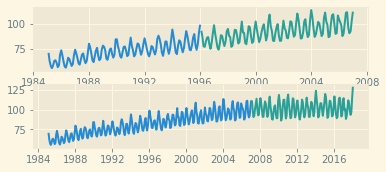

In [37]:
# Expanding Windows

X = ecprod['IPG2211A2N']
splits = TimeSeriesSplit(n_splits=2)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train_prod_mul = X[train_index]
    test_prod_mul = X[test_index]
    print('Observations: %d' % (len(train_prod_mul) + len(test_prod_mul)))
    print('Training Observations: %d' % (len(train_prod_mul)))
    print('Testing Observations: %d' % (len(test_prod_mul)))
    pyplot.subplot(310 + index)
    pyplot.plot(train_prod_mul)
    pyplot.plot(test_prod_mul)
    index += 1
pyplot.show()

RMSE: 4.90
MAPE: 4.27%
RMSE: 9.31
MAPE: 7.86%
RMSE_mean: 7.10
MAPE_mean: 6.07%


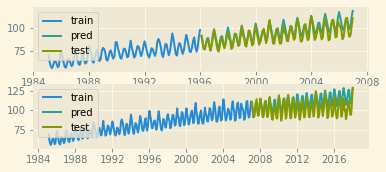

In [38]:
# Quality Metrics

RMSE = []
MAPE = []
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train_prod_mul = X[train_index]
    test_prod_mul = X[test_index]
    model_prod_mul = sm.tsa.statespace.SARIMAX(train_prod_mul,
                                order=best_result[0],
                                seasonal_order=best_result[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results_prod_mul = model_prod_mul.fit()
    pred_prod_mul = results_prod_mul.forecast(len(test_prod_mul))
    
    RMSE.append(rmse(test_prod_mul, pred_prod_mul))
    MAPE.append(mean_absolute_percentage_error(test_prod_mul, pred_prod_mul))
    print('RMSE: {:0.2f}'.format(RMSE[index-1]))
    print('MAPE: {:0.2f}%'.format(MAPE[index-1]*100))
    
    pyplot.subplot(310 + index)
    pyplot.plot(train_prod_mul, label='train')
    pyplot.plot(pred_prod_mul, label='pred')
    pyplot.plot(test_prod_mul, label='test')
    pyplot.legend()
    index += 1

RMSE = np.mean(RMSE)
MAPE = np.mean(MAPE)
print('RMSE_mean: {:0.2f}'.format(RMSE))
print('MAPE_mean: {:0.2f}%'.format(MAPE*100))

### Forecasting

Proyeksi hari ke-8: 114.26
Proyeksi hari ke-9: 105.00
Proyeksi hari ke-10: 92.70
Proyeksi hari ke-11: 94.10
Proyeksi hari ke-12: 104.64
Proyeksi hari ke-13: 113.88
Proyeksi hari ke-14: 112.72
Proyeksi hari ke-15: 102.04
Proyeksi hari ke-16: 93.93
Proyeksi hari ke-17: 97.19
Proyeksi hari ke-18: 112.48
Proyeksi hari ke-19: 122.12


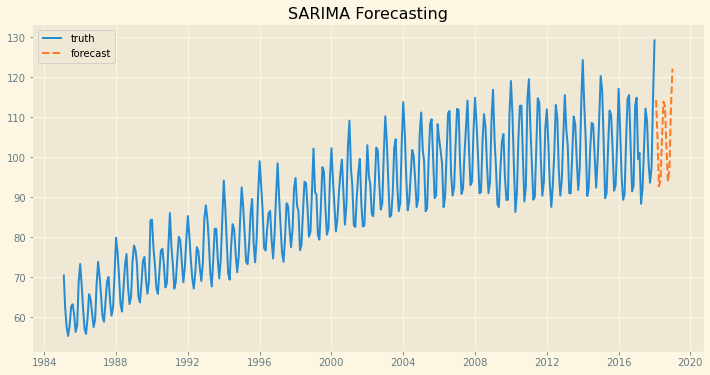

In [39]:
fc = results.forecast(12)
for i in range(12):
    print("Proyeksi hari ke-"+str(i+8)+": %.2f" % (fc[i:i+1]))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ecprod['IPG2211A2N'], label='truth');
ax.plot(fc, linestyle='--', color='#ff7823', label="forecast");
ax.legend();
ax.set_title("SARIMA Forecasting");

# RNN Model

In [40]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [41]:
import tensorflow as tf
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
!nvidia-smi

In [ ]:
# derived from here: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
n_steps_in = 40 #@param {type:"slider", min:1, max:100, step:1}
n_steps_out = 1

In [ ]:
import numpy as np
npecprod = ecprod['IPG2211A2N'] .to_numpy()
X, Y = split_sequence(npecprod, n_steps_in, n_steps_out)
X.shape, Y.shape

In [ ]:
# reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

In [ ]:
X_train = X[:-30]
Y_train = Y[:-30]

X_test = X[-30:]
Y_test = Y[-30:]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

In [ ]:
# only works on tensors while training, use sklearn version when using on numpy arrays

def r2_metric(y_true, y_pred):
  total_error = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
  unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
  R_squared = tf.subtract(1.0, tf.divide(unexplained_error, total_error))
  
  return R_squared

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model

model = Sequential()

# two layer model, known to work well
# model.add(GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(GRU(100, activation='relu'))

# trains faster, but also works
# model.add(GRU(256, activation='relu', input_shape=(n_steps_in, n_features)))

# one layer SimpleRNN seems to be enough for this data set
model.add(SimpleRNN(256, activation='relu', input_shape=(n_steps_in, n_features)))

# horrible results
# model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(LSTM(64, activation='relu'))

# optional regularization
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


# combines final outputs from RNN into continous output
model.add(Dense(n_steps_out))

model.compile(optimizer='adam', loss='mse', metrics=[r2_metric])

model.summary()

In [ ]:
%%time

batch_size = 32
epochs=22

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(X_test, Y_test),
                    verbose=1)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
# plt.xkcd()
# plt.style.use('ggplot')
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)

In [ ]:
plt.yscale('log')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Log Loss over Epochs')

plt.legend(['loss', 'validation loss']);

In [ ]:
plt.yscale('log')
plt.plot(history.history['r2_metric'])
plt.plot(history.history['val_r2_metric'])
plt.title('R^2 over Epochs')

plt.legend(['r2', 'validation r2']);

In [ ]:
model.evaluate(X, Y, batch_size=batch_size, verbose=0)

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_percentage_error, r2_score

Y_pred = model.predict(X)
r2_score(Y, Y_pred)

In [ ]:
Y_train_pred = model.predict(X_train)
r2_score(Y_train, Y_train_pred)

In [ ]:
Y_test_pred = model.predict(X_test)
print('R Squared: {:0.2f}'.format(r2_score(Y_test, Y_test_pred)))
print('R Squared: {:0.2f}%'.format(mean_absolute_percentage_error(Y_test, Y_test_pred)*100))

In [ ]:
# this gets really crowded, using a stride, makes it more readable
stride = 10

# for the 30 days we have no prediction, so get rid of them
plt.plot(npecprod[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred[::stride], color='r', ls='dashed')

plt.title('All data, train and test combined, stride 10');

In [ ]:
stride = 1


plt.plot(npecprod[-30::stride], alpha=0.5, color='g')
plt.plot(Y_test_pred[::stride], color='r', ls='dashed')

plt.title('Test data, no stride');